In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data=pd.read_csv(r'https://raw.githubusercontent.com/training-ml/Files/main/Mall_Customers.csv')

In [4]:
data.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [13]:
#  dataset
X= data.iloc[:,3:]
X.head(6)


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76


In [14]:
X.shape

(200, 2)

In [6]:
from sklearn.cluster import KMeans

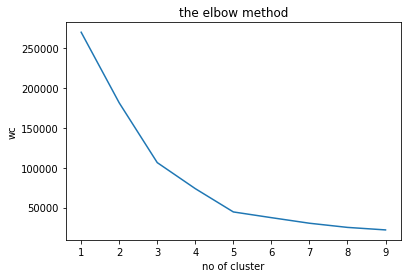

In [7]:
#  Elbow method to find best no. of cluster
wc=[]
for i in range(1,10):
    kmeans= KMeans(n_clusters=i,init= 'k-means++', random_state=40)
    kmeans.fit(X)
    wc.append(kmeans.inertia_)
plt.plot(range(1,10), wc)
plt.title('the elbow method')
plt.xlabel('no of cluster')
plt.ylabel('wc')
plt.show()

In [29]:
# Fitting K_means to the dataset

kmeans= KMeans(n_clusters = 5, init= 'k-means++', random_state=43)


In [30]:
ymeans= kmeans.fit_predict(X)

In [31]:
print(ymeans)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 0 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 0 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 0 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


In [32]:
test=kmeans.predict(np.asarray([[15,39]]))
test[0]

C:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


2

In [33]:
# saving the model to the local file system

import pickle

In [34]:
filename= 'final_model.pickle'
pickle.dump(kmeans, open(filename, 'wb'))

In [37]:
# Looking at the points which cluster belong
X[ymeans == 3].head(6)

,Annual Income (k$),Spending Score (1-100)
123,69,91
125,70,77
127,71,95
129,71,75
131,71,75
133,72,71


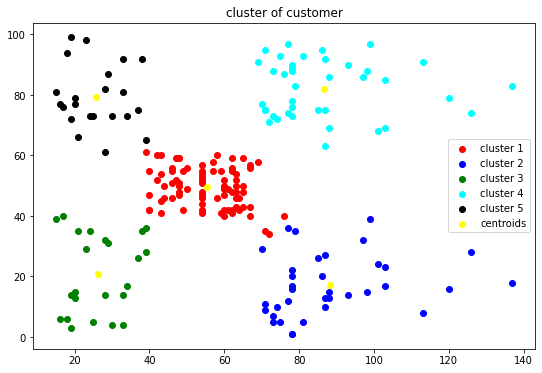

In [47]:
# visualize the clusters
plt.figure(figsize=(9,6))
plt.scatter(X[ymeans == 0]['Annual Income (k$)'], X[ymeans == 0]
            ['Spending Score (1-100)'],c= 'red', label='cluster 1')
plt.scatter(X[ymeans == 1]['Annual Income (k$)'], X[ymeans == 1]
            ['Spending Score (1-100)'],c= 'blue', label= 'cluster 2')
plt.scatter(X[ymeans == 2]['Annual Income (k$)'], X[ymeans == 2]
            ['Spending Score (1-100)'],c= 'green',label='cluster 3')
plt.scatter(X[ymeans == 3]['Annual Income (k$)'], X[ymeans == 3]
            ['Spending Score (1-100)'],c= 'cyan',label='cluster 4')
plt.scatter(X[ymeans == 4]['Annual Income (k$)'], X[ymeans == 4]
            ['Spending Score (1-100)'],c= 'black',label='cluster 5')


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='yellow',label='centroids')

plt.title('cluster of customer')
plt.legend()
plt.show()